# **Uploading Data File**

In [291]:
!mkdir data/
!wget https://raw.githubusercontent.com/SrikanthJ7/OreQualityPrediction/main/Data_OreQualityPred.xlsx

mkdir: cannot create directory ‘data/’: File exists
--2024-04-25 18:20:25--  https://raw.githubusercontent.com/SrikanthJ7/OreQualityPrediction/main/Data_OreQualityPred.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1935094 (1.8M) [application/octet-stream]
Saving to: ‘Data_OreQualityPred.xlsx’

Data_OreQualityPred 100%[===================>]   1.84M  --.-KB/s    in 0.06s   

2024-04-25 18:20:25 (31.1 MB/s) - ‘Data_OreQualityPred.xlsx’ saved [1935094/1935094]



# **Import Statements**


In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from pylab import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# **Making Data Frame**

In [293]:
df = pd.read_excel('/content/Data_OreQualityPred.xlsx')

df = df.head(10000)   # reducing size of data to 10000 cases

df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53",557434,395713,100664,"1,74",249214,253235,...,250884,457396,432962,424954,443558,502255,"446,37",523344,"66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41",563965,397383,100672,"1,74",249719,250532,...,248994,451891,"429,56",432939,448086,496363,445922,498075,"66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46",568054,399668,10068,"1,74",249741,247874,...,248071,"451,24",468927,"434,61",449688,484411,447826,458567,"66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36",568665,397939,100689,"1,74",249917,254487,...,251147,452441,458165,442865,"446,21",471411,"437,69",427669,"66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69",558167,400254,100697,"1,74",250203,252136,...,248928,452441,"452,9",450523,"453,67",462598,443682,425679,"66,91","1,31"


# **Data Analysis**

In [294]:
df.describe()

,date,Flotation Column 04 Air Flow
count,10000,10000.0
mean,2017-03-11 04:18:46.800000,295096.0
min,2017-03-10 01:00:00,295096.0
25%,2017-03-10 14:00:00,295096.0
50%,2017-03-11 04:00:00,295096.0
75%,2017-03-11 18:00:00,295096.0
max,2017-03-12 08:00:00,295096.0
std,NaN,0.0


In [295]:
print(df.columns)

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')


In [296]:
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [297]:
df_shape = df.shape

In [298]:
df_shape

(10000, 24)

In [299]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53",557434,395713,100664,"1,74",249214,253235,...,250884,457396,432962,424954,443558,502255,"446,37",523344,"66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41",563965,397383,100672,"1,74",249719,250532,...,248994,451891,"429,56",432939,448086,496363,445922,498075,"66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46",568054,399668,10068,"1,74",249741,247874,...,248071,"451,24",468927,"434,61",449688,484411,447826,458567,"66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36",568665,397939,100689,"1,74",249917,254487,...,251147,452441,458165,442865,"446,21",471411,"437,69",427669,"66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69",558167,400254,100697,"1,74",250203,252136,...,248928,452441,"452,9",450523,"453,67",462598,443682,425679,"66,91","1,31"


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          10000 non-null  datetime64[ns]
 1   % Iron Feed                   10000 non-null  object        
 2   % Silica Feed                 10000 non-null  object        
 3   Starch Flow                   10000 non-null  object        
 4   Amina Flow                    10000 non-null  object        
 5   Ore Pulp Flow                 10000 non-null  object        
 6   Ore Pulp pH                   10000 non-null  object        
 7   Ore Pulp Density              10000 non-null  object        
 8   Flotation Column 01 Air Flow  10000 non-null  object        
 9   Flotation Column 02 Air Flow  10000 non-null  object        
 10  Flotation Column 03 Air Flow  10000 non-null  object        
 11  Flotation Column 04 Air Flow 

# **Data Preprocessing**

# **Changing Datatypes from 'object' to 'float'**

In [301]:


# Remove commas and convert columns to float
columns_to_convert = df.columns.difference(['date'])  # Exclude the 'date' column
df[columns_to_convert] = df[columns_to_convert].replace(',', '.', regex=True).astype(float)


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          10000 non-null  datetime64[ns]
 1   % Iron Feed                   10000 non-null  float64       
 2   % Silica Feed                 10000 non-null  float64       
 3   Starch Flow                   10000 non-null  float64       
 4   Amina Flow                    10000 non-null  float64       
 5   Ore Pulp Flow                 10000 non-null  float64       
 6   Ore Pulp pH                   10000 non-null  float64       
 7   Ore Pulp Density              10000 non-null  float64       
 8   Flotation Column 01 Air Flow  10000 non-null  float64       
 9   Flotation Column 02 Air Flow  10000 non-null  float64       
 10  Flotation Column 03 Air Flow  10000 non-null  float64       
 11  Flotation Column 04 Air Flow 

In [303]:
df.drop_duplicates(subset = df.iloc[:, 1:24], inplace=True)  # Removing duplicates, keep the first reading.
df_shape = df.shape
df_shape

(9999, 24)

# **Outlier Removal**

In [304]:
# Select columns 2 to 24
data = df.iloc[:, 1:24]

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((data < lower_bound) | (data > upper_bound))

# Remove rows containing outliers
df_no_outliers = df[~outliers.any(axis=1)]

# Update the original DataFrame
df = df_no_outliers.copy()

# Print the updated DataFrame
print(df)


                    date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0    2017-03-10 01:00:00        55.20          16.98      3019.53    557434.0   
1    2017-03-10 01:00:00        55.20          16.98      3024.41    563965.0   
10   2017-03-10 01:00:00        55.20          16.98      3148.05    561951.0   
12   2017-03-10 01:00:00        55.20          16.98      3280.27    564026.0   
17   2017-03-10 01:00:00        55.20          16.98      3784.96    557983.0   
...                  ...          ...            ...          ...         ...   
9992 2017-03-12 08:00:00        58.82          11.46      3669.73    511719.0   
9996 2017-03-12 08:00:00        58.82          11.46      3716.80    513611.0   
9997 2017-03-12 08:00:00        58.82          11.46      3756.45    512939.0   
9998 2017-03-12 08:00:00        58.82          11.46      3796.68    512756.0   
9999 2017-03-12 08:00:00        58.82          11.46      3806.64    516724.0   

      Ore Pulp Flow  Ore Pu

# **Scaling the data**

In [305]:


# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:24])
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[1:24])

print(scaled_df)

      % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  Ore Pulp Flow  \
0       -0.876093       0.730024    -0.881133    0.485654      -0.854531   
1       -0.876093       0.730024    -0.876184    0.562833      -0.506613   
2       -0.876093       0.730024    -0.750804    0.539033      -0.683697   
3       -0.876093       0.730024    -0.616722    0.563554      -1.306199   
4       -0.876093       0.730024    -0.104927    0.492142      -1.037656   
...           ...            ...          ...         ...            ...   
1274     0.799646      -0.720287    -0.221780   -0.054577      -0.012236   
1275     0.799646      -0.720287    -0.174047   -0.032218      -0.195362   
1276     0.799646      -0.720287    -0.133839   -0.040160       1.092560   
1277     0.799646      -0.720287    -0.093042   -0.042322      -0.530988   
1278     0.799646      -0.720287    -0.082942    0.004569       1.116935   

      Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0       -0.733528 

# **Plotting Heat map**

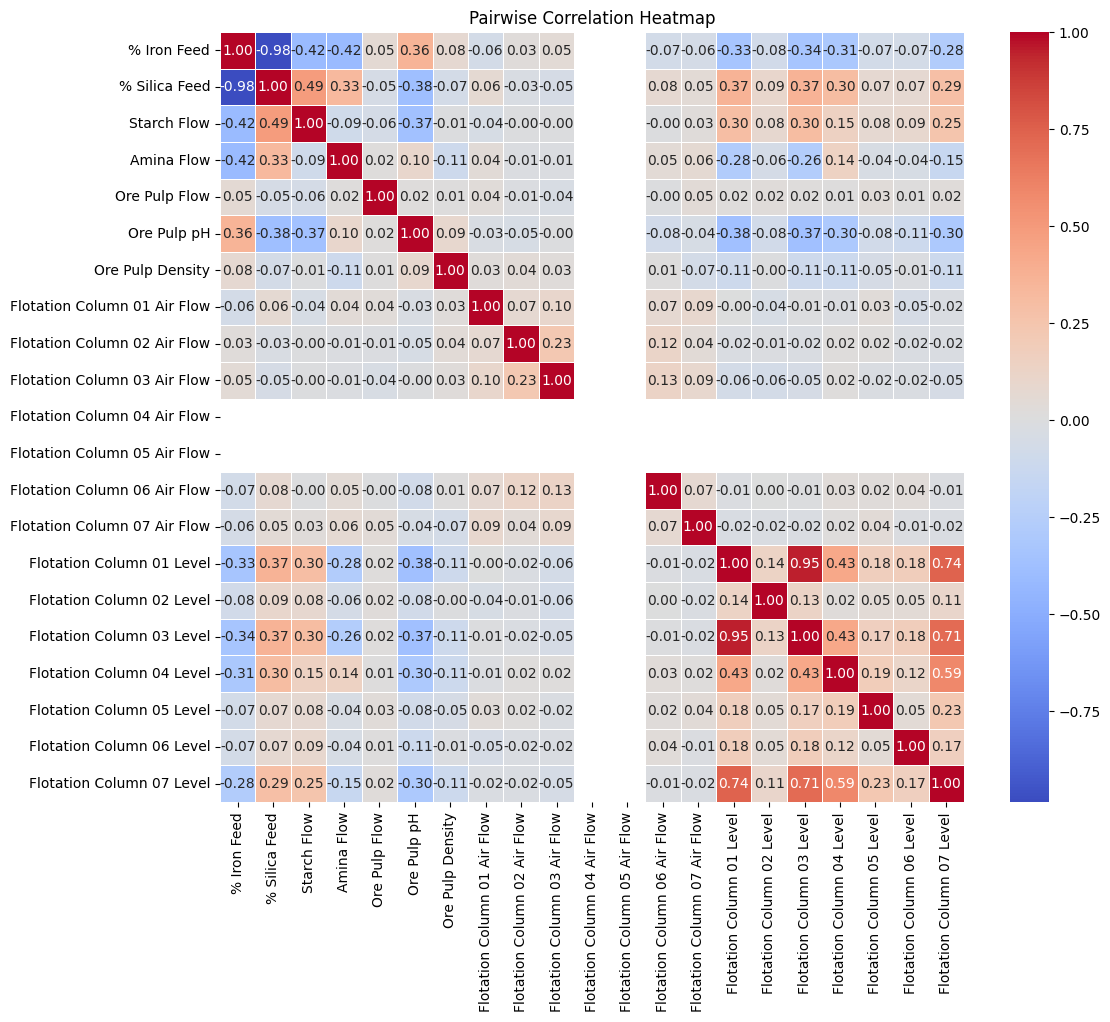

In [306]:
# Pairwise correlation heatmap
correlation_matrix = scaled_df.iloc[:,0:21].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pairwise Correlation Heatmap")
plt.show()


# There are not so strong correlations between them, except for the iron and silica concentrate. Hence, Feature extraction is not performed

# Finding relation between features and labels

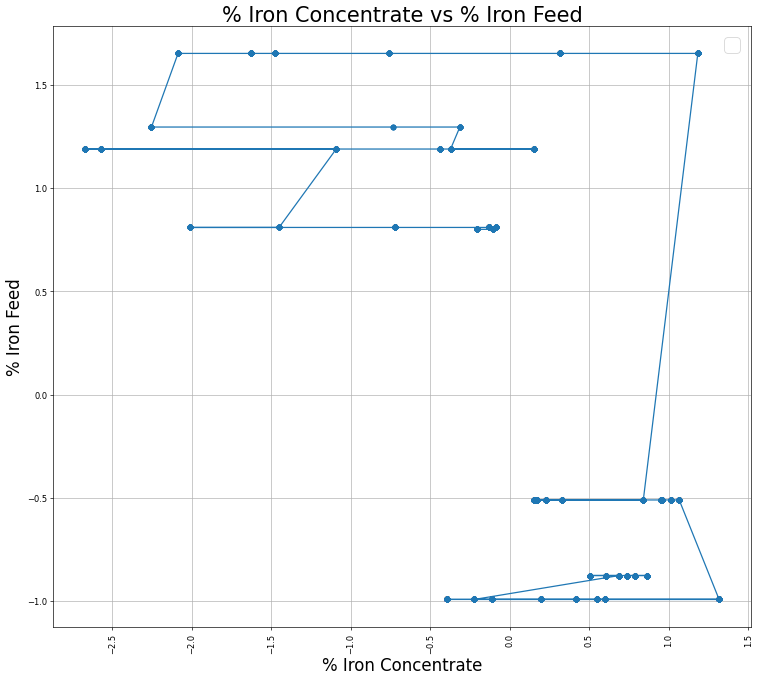

<Figure size 6000x300 with 0 Axes>

In [307]:

width_in_inches = 15
height_in_inches = 13
dots_per_inch = 60

plt.figure(
    figsize=(width_in_inches, height_in_inches),
    dpi=dots_per_inch)

x_axis = scaled_df['% Iron Concentrate']
y_axis = scaled_df['% Iron Feed']
plot(x_axis, y_axis,marker='o')
plt.xticks(rotation=90)
plt.legend(loc="upper right",prop={"size":25})
xlabel('% Iron Concentrate',fontsize = 20)
ylabel('% Iron Feed',fontsize = 20)
title('% Iron Concentrate vs % Iron Feed',fontsize = 25)
grid(True)
plt.figure(figsize=(60,3))
show()



# The below graph is an example, which shows that there is no such linear relationship between feature and label in this case
# Similar results appear for remaining features as well, this shows that Linear Regression model may perform poorly for this data.

# **Training and testing the models**

# **Linear Regression Model**

In [308]:

# Define features (X) and target variable (y)
X = scaled_df.iloc[:, 0:21]  # Columns 1 to 21
y = scaled_df.iloc[:, 21:]   # Columns 22 and 23

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [309]:

regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train,y_train)

y_pred_mlr = regressor_mlr.predict(X_test)
print('R2 Score of Multi Linear Regression',r2_score(y_test,y_pred_mlr))


# As expected, R^2 is low for Linear Regression model.

R2 Score of Multi Linear Regression 0.43505415618929266


In [310]:
# converting y_pred_mlr numpy array into a dataframe
y_pred_mlr_df = pd.DataFrame(y_pred_mlr, columns=y_test.columns)

# Display the DataFrame
print(y_pred_mlr_df)

     % Iron Concentrate  % Silica Concentrate
0             -0.741261              0.691496
1             -0.784771              0.882331
2              0.481519             -0.389926
3              0.206652             -0.185219
4             -0.525149              0.790269
..                  ...                   ...
251            0.413545             -0.400168
252            0.315971             -0.204284
253            0.804951             -0.898231
254           -1.099294              0.879905
255           -0.854625              0.727381

[256 rows x 2 columns]


# Evaluating metrics

In [311]:

# Evaluating metrics

mse = mean_squared_error(y_test, y_pred_mlr)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Square Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.6286480043905172
Root Mean Square Error (RMSE): 0.7928732587182628


# Plot of actual vs Predicted values for MLR model

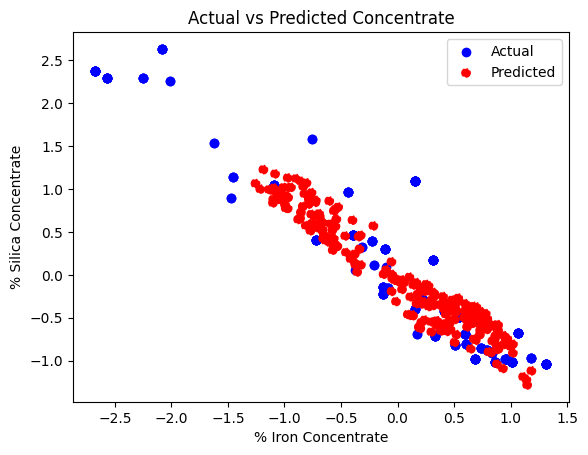

In [312]:

# Plotting for y_test dataframe
plt.scatter(y_test['% Iron Concentrate'], y_test['% Silica Concentrate'], label='Actual', color='blue', linestyle='-')

# Plotting for y_pred_mlr dataframe
plt.scatter(y_pred_mlr_df['% Iron Concentrate'], y_pred_mlr_df['% Silica Concentrate'], label='Predicted', color='red', linestyle='-.')

# Adding labels and title
plt.xlabel('% Iron Concentrate')
plt.ylabel('% Silica Concentrate')
plt.title('Actual vs Predicted Concentrate')

# Display the legend
plt.legend()

# Display the plot
plt.show()


# **Support Vector Machines Model**

In [313]:

# Define features and target variables
X = scaled_df.iloc[:, :21]  # Features
y = scaled_df.iloc[:, 21:]  # Target variables

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

# Initialize SVR model
svm_regressor = SVR()

# Wrap SVR within MultiOutputRegressor
multioutput_regressor = MultiOutputRegressor(svm_regressor)

# Train the model
multioutput_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = multioutput_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)



Mean Squared Error (MSE): 0.42418359983870535
Root Mean Squared Error (RMSE): 0.6512937891909498
Mean Absolute Error (MAE): 0.4572286727421464
R^2 Score: 0.618927491847118


In [314]:
# converting y_pred numpy array into a dataframe
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns)

# Display the DataFrame
print(y_pred_df)

     % Iron Concentrate  % Silica Concentrate
0             -0.776733              1.088522
1             -0.955354              1.040305
2              0.392374             -0.476779
3             -0.077945             -0.019230
4             -0.092776              0.362460
..                  ...                   ...
251            0.204881             -0.123187
252           -0.100470              0.033364
253            0.860968             -0.800534
254           -1.555642              1.351497
255           -0.475271              0.708930

[256 rows x 2 columns]


# Plotting actual vs Predicted values for SVM model

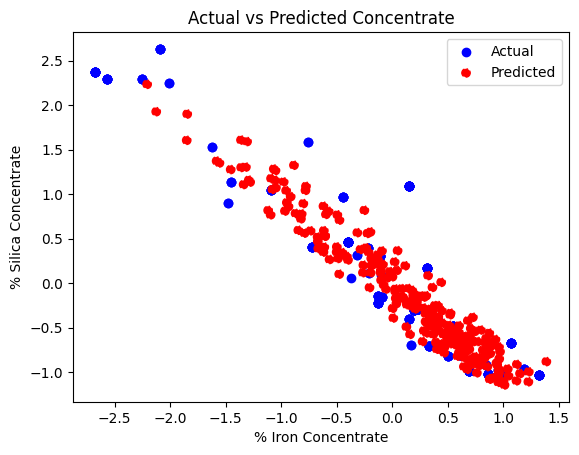

In [315]:

# Plotting for y_test dataframe
plt.scatter(y_test['% Iron Concentrate'], y_test['% Silica Concentrate'], label='Actual', color='blue', linestyle='-')

# Plotting for y_pred_df dataframe
plt.scatter(y_pred_df['% Iron Concentrate'], y_pred_df['% Silica Concentrate'], label='Predicted', color='red', linestyle='-.')

# Adding labels and title
plt.xlabel('% Iron Concentrate')
plt.ylabel('% Silica Concentrate')
plt.title('Actual vs Predicted Concentrate')

# Display the legend
plt.legend()

# Display the plot
plt.show()

# **Random Forest Regression with hyperparameter tuning**

In [ ]:



# Splitting data into train, validation, and test sets
X = scaled_df.iloc[:, :21].values  # Features
y = scaled_df.iloc[:, 21:].values  # Targets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=36)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=36)

# Random Forest Regression model
rf_reg = RandomForestRegressor(random_state=36)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_grid, n_iter=100,
                               cv=3, verbose=2, random_state=36, n_jobs=-1)

rf_random.fit(X_train, y_train)

# Best parameters
best_params = rf_random.best_params_

# Predictions before hyperparameter tuning
y_val_pred_before = rf_reg.fit(X_train, y_train).predict(X_val)

# Predictions after hyperparameter tuning
y_val_pred_after = rf_random.best_estimator_.predict(X_val)

# Evaluation metrics before hyperparameter tuning
mse_before = mean_squared_error(y_val, y_val_pred_before)
mae_before = mean_absolute_error(y_val, y_val_pred_before)
r2_before = r2_score(y_val, y_val_pred_before)
rmse_before = np.sqrt(mse_before)

# Evaluation metrics after hyperparameter tuning
mse_after = mean_squared_error(y_val, y_val_pred_after)
mae_after = mean_absolute_error(y_val, y_val_pred_after)
r2_after = r2_score(y_val, y_val_pred_after)
rmse_after = np.sqrt(mse_after)

# Printing results
print("Before Hyperparameter Tuning:")
print("R^2:", r2_before)
print("RMSE:", rmse_before)
print("MAE:", mae_before)

print("\nAfter Hyperparameter Tuning:")
print("R^2:", r2_after)
print("RMSE:", rmse_after)
print("MAE:", mae_after)

# Random forest model works much better than Linear Regression model.

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


# Plot of actual vs Predicted values before hyperparameter tuning

In [ ]:


# Extracting % Iron Concentrate and % Silica Concentrate from test set
iron_concentrate_test = y_test[:, 0]  # Assuming column index 21 corresponds to % Iron Concentrate
silica_concentrate_test = y_test[:, 1]  # Assuming column index 22 corresponds to % Silica Concentrate

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(iron_concentrate_test, silica_concentrate_test, color='blue', label='Actual')
plt.scatter(y_val_pred_before[:, 0], y_val_pred_before[:, 1], color='red', label='Predicted')
plt.xlabel('% Iron Concentrate')
plt.ylabel('% Silica Concentrate')
plt.title('Actual vs Predicted Concentrate before hyperparameter tuning')
plt.legend()
plt.show()

# Plot of actual vs Predicted values after hyperparameter tuning

In [ ]:


# Extracting % Iron Concentrate and % Silica Concentrate from test set
iron_concentrate_test = y_test[:, 0]  # Assuming column index 21 corresponds to % Iron Concentrate
silica_concentrate_test = y_test[:, 1]  # Assuming column index 22 corresponds to % Silica Concentrate

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(iron_concentrate_test, silica_concentrate_test, color='blue', label='Actual')
plt.scatter(y_val_pred_after[:, 0], y_val_pred_after[:, 1], color='red', label='Predicted')
plt.xlabel('% Iron Concentrate')
plt.ylabel('% Silica Concentrate')
plt.title('Actual vs Predicted Concentrate after hyperparameter tuning')
plt.legend()
plt.show()